<a href="https://colab.research.google.com/github/MTHNTS008/EEE4022S_FINAL_PROJECT_2019/blob/master/ONE_SHOT_SIMILARITY_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###INSTALLATIONS

In [0]:
!pip install Pillow==4.0.0
#!pip install PIL
#!pip install image

     |████████████████████████████████| 5.6MB 2.8MB/s 
ERROR: torchvision 0.4.0 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
ERROR: scikit-image 0.15.0 has requirement pillow>=4.3.0, but you'll have pillow 4.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


In [0]:
'''!pip install pillow
!sudo pip install Pillow==2.6.0
'''
!pip install scipy==1.2.1


     |████████████████████████████████| 24.8MB 1.6MB/s 
ERROR: scikit-image 0.15.0 has requirement pillow>=4.3.0, but you'll have pillow 4.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1


In [0]:
#!ls
#!rm -r 'images_background_iv_2'
#!rm -r 'images_evaluation_2'

!rm -r 'vis'

###GETTING LOCAL FILES

In [0]:
from zipfile import ZipFile
#file_name = "validation.zip"
file_name = "densefuse_gray.zip"
file_name = "data.zip"
#file_name = "Model.zip"
#file_name = "IV_images Many.zip"
#file_name = "powerline ir and visible.zip"
#file_name = "\checkpoints.zip"

file_name = "images_background_iv_2.zip"
#file_name = "images_evaluation_2.zip"

#file_name = "images_evaluation_data.zip"

file_name = "VIS.zip"
#file_name = "NIR.zip"


#file_name = "vis.zip"
#file_name = "nir.zip"
#file_name = "New folder.zip"

with ZipFile (file_name, 'r') as zip:
  zip.extractall()
  


In [0]:
!zip -r /content /content/Folder_To_Zip

In [0]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()


In [0]:
drive_service = build('drive', 'v3')
def save_file_to_drive(name, path):
    file_metadata = {'name': name,'mimeType': 'application/octet-stream'}

    media = MediaFileUpload(path, mimetype='application/octet-stream',resumable=True)

    created = drive_service.files().create(body=file_metadata,
                                   media_body=media,
                                   fields='id').execute()

    print('File ID: {}'.format(created.get('id')))

    return created

In [0]:
save_file_to_drive('Weights', '/content/weights.1.h5')

In [0]:
!git push 

fatal: not a git repository (or any of the parent directories): .git


In [0]:
for i in range(10, 3000):
    from google.colab import files
    i = str(i)
    files.download('weights.'+i+'.h5')
    print(i)

###IMPORT LIBRARIES

In [0]:

# Import Keras and other Deep Learning dependencies
from keras.models import Sequential
import time
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
import seaborn as sns
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import *
from keras.engine.topology import Layer
from keras import backend as K
from keras.regularizers import l2
K.set_image_data_format('channels_last')
import cv2
import os
from skimage import io
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy.random as rng
from sklearn.utils import shuffle


%matplotlib inline
%load_ext autoreload
%reload_ext autoreload

#np.set_printoptions(threshold=np.nan)

from tqdm import tqdm
from keras import regularizers

import pickle

from PIL import Image
import imageio
from scipy import misc
import scipy
from scipy.misc.pilutil import imread, imsave, imresize


import skimage.io
import sys
import numpy as np
import pandas as pd
from scipy.misc import imread
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng
import glob

from keras.layers import *

Using TensorFlow backend.


##MODEL

### FIRST

In [0]:
def one_shot(i_shape):
    left_image = Input(i_shape)
    right_image = Input(i_shape)
   
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=i_shape, kernel_initializer='random_uniform', kernel_regularizer = regularizers.l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer='random_uniform',
                     bias_initializer= 'zeros', kernel_regularizer= regularizers.l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer='random_uniform',
                     bias_initializer= 'zeros', kernel_regularizer= regularizers.l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer='random_uniform',
                     bias_initializer= 'zeros', kernel_regularizer= regularizers.l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer= regularizers.l2(1e-3),
                   kernel_initializer='random_uniform',bias_initializer= 'zeros'))
    Left_tensor = model(left_image)
    Right_tensor = model(right_image)
    L1 = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    loss_fcn = L1([Left_tensor, Right_tensor])
    predt = Dense(1,activation='sigmoid',bias_initializer= 'zeros')(loss_fcn)
    similarity = Model(inputs=[left_image,right_image],outputs=predt)
    return similarity

### SECOND

In [0]:
def get_siamese_model2(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    model1 = Sequential()
    model1.add(Conv2D(64, (3,3), activation = 'relu',input_shape=input_shape, padding = 'same', kernel_initializer = 'he_normal'))
    
    model1.add(Dropout(0.05))
    model1.add(MaxPooling2D(pool_size=(2, 2)))

    model1.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
   
    model1.add(Dropout(0.05))
    model1.add(MaxPooling2D(pool_size=(2, 2)))

    model1.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
   
    model1.add(Dropout(0.05))
    model1.add(MaxPooling2D(pool_size=(2, 2)))

    model1.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
    
    model1.add(Dropout(0.05))
    model1.add(MaxPooling2D(pool_size=(2, 2)))

    model1.add(Conv2D(1024, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
    
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    prediction = Dense(1,activation='sigmoid',bias_initializer= 'zeros')(L1_distance)
    siamese_net2 = Model(inputs=[left_input,right_input],outputs=prediction)
    return siamese_net2
                                                                                                     

###PLOTTING ARCHITECHTURE

In [0]:
import pydot
from keras.utils import plot_model
from IPython.display import SVG
import keras.utils.vis_utils 
from keras.utils.vis_utils import model_to_dot
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
from IPython.display import Image
Image(retina=True, filename='model.png')

In [0]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##SOME FUNCTIONS

###MAKE SMALL BATCHES

In [0]:
def gen_batches(x_dir: str, config: dict):
    """
    Given the x folder and the y folder, generate a function for the batch tensor
    :param x_dir: Moving Image folder absolute path
    :param y_dir: Fixed Image folder absolute path
    :param config: config["shuffle_batch"]：Whether shuffle batch
                    config["batch_size"]：Batch size
                    config["image_size"]：Image height and width, tuple type
                    
    :return: Tensor('batch_x', dtype=float32, shape=[batch_size, img_height, img_width, 1])
            Tensor('batch_y', dtype=float32, shape=[batch_size, img_height, img_width, 1])
    """
    
    x_arr = sorted(glob.glob(x_dir + '*.png'))
    #y_arr = sorted(glob.glob(y_dir + '*.png'))

    #assert len(x_arr) == len(y_arr)

    # Build input queue & batch
    input_queue = tf.train.slice_input_producer([x_arr], shuffle=config["shuffle_batch"])
    batch_x = tf.train.batch(input_queue, batch_size=config["batch_size"])
    print(batch_x)

  
    def _f(input_tensor, batch_size: int, img_height: int, img_width: int, channels: int):
        _ = np.stack([normalize(cv2.resize(np.array(Image.open(img_name)), dsize=(128,128), interpolation=cv2.INTER_CUBIC)) for img_name in input_tensor], axis=0)
        return _.astype(np.float32).reshape([batch_size, img_height, img_width, channels])

    # Apply external python function to handle tensor
    batch_x = tf.py_func(_f, [batch_x, config["batch_size"], *config["image_size"], 1], tf.float32)
    #batch_y = tf.py_func(_f, [batch_y, config["batch_size"], *config["image_size"], 1], tf.float32)
    
    print('BATCH_X',batch_x)
    return batch_x 
  #, batch_y

In [0]:
def config_folder_guard(config: dict):
    if not os.path.exists(config["checkpoint_dir"]):
        os.makedirs(config["checkpoint_dir"])
    if not os.path.exists(config["temp_dir"]):
        os.makedirs(config["temp_dir"])
    if not os.path.exists(config["log_dir"]):
        os.makedirs(config["log_dir"])
    return config

In [0]:
config = config_folder_guard({
        # train_parameters
        'image_size': [128, 128],
        'batch_size': 10,
        'learning_rate': 1e-4,
        'epoch_num': 10,
        'save_interval': 5,
        'shuffle_batch': True,
        # trainNet data folder
        'checkpoint_dir': r'\checkpoints',
        'temp_dir': r'\validate',
        'log_dir': r'\log'
    })

In [0]:
batch_x = gen_batches(train_x_dir,{
        'batch_size': config['batch_size'],
        'image_size': config['image_size'],
        'shuffle_batch': config['shuffle_batch']})

###GET IMAGES FUNCTION

In [0]:
def get_image(path, height=256, width=256, set_mode='L'):
       
    #image = imread(path, mode=set_mode)
    
    
    image = scipy.misc.imread(path, mode=set_mode)
    image = imresize(image, [height, width,3], interp='nearest')
    d = image.shape
    image = np.reshape(image, [d[0], d[1], 3])
    print('Image shape:',image.shape)
    
    if height is not None and width is not None:
      d = image.shape
      image = np.reshape(image, [d[0], d[1], 3])
      #image = imresize(image, [height, width], interp='nearest')
    return image

###LOADING DATASET

In [0]:
train_folder = "/content/images_background_iv_2/"
val_folder = '/content/images_evaluation_2/'
save_path = '/content/'

In [0]:
def loadimgs(path,n = 0):
    '''
    path => Path of train directory or test directory
    '''
    X=[]
    y = []
    cat_dict = {}
    lang_dict = {}
    curr_y = n
    image_list1 =[]
    
    #DIR = path + letter + '/'


    
    # we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        print("loading alphabet: " + alphabet)        
        lang_dict[alphabet] = [curr_y,None]
        alphabet_path = os.path.join(path,alphabet)
        print('alphabet_path',alphabet_path)
        
        # every letter/category has it's own column in the array, so  load seperately
        for letter in os.listdir(alphabet_path):
            DIR = alphabet_path + '/' + letter + '/'
            print('letter',letter)
            cat_dict[curr_y] = (alphabet, letter)
            category_images = []
            letter_path = os.path.join(alphabet_path, letter)           
            '''#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
            batch_x = gen_batches(DIR,{'batch_size': config['batch_size'],'image_size': config['image_size'], 'shuffle_batch': config['shuffle_batch']})
            print('Start....')
            #sess = tf.Session()
            #_bx, = sess.run([batch_x])
            #sess.run(tf.global_variables_initializer())
            print('BATCH:',_bx.shape)'''
            #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'''
      
            #read all the images in the current category
            for filename in tqdm((glob.glob(DIR + '*.bmp'))):
            #for filename in tqdm((glob.glob(DIR + '*.png'))):
            #for filename in os.listdir(letter_path):
                src=cv2.imread(filename)
                dst1 = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
                #d = dst1.shape
                #print(d)
                patch = np.copy(dst1[10:10+128,10:10+128])
                #patches = image.extract_patches_2d(one_image, (128, 128))
                #patch = extractPatches(dst, '/content/')
                #img = Resize(dst)            
                
                '''image_path = os.path.join(letter_path, filename)                
                image = imread(image_path) '''  
                #vis = get_image(filename, 256, 256,'L')
                image_list1.append(patch)
                dataset1 = np.array(image_list1)               
                category_images.append(patch)
                y.append(curr_y)
            try:
                X.append(np.stack(category_images))
            # edge case  - last one
            except ValueError as e:
                print(e)
                print("error - category_images:", category_images)
                
            curr_y += 1
            lang_dict[alphabet][1] = curr_y - 1           
    
        
    y = np.vstack(y)
    X = np.stack(X)
    print(dataset1.shape)
    print()
    
    return X,y,lang_dict

###IMAGE PATCH

In [0]:
def loadImage(imgpath):
    try:
    	im = misc.imread(imgpath)
    	return im
    except:
    	print ("Can't open image. Check image again: " + imgpath)

def extractPatches(im, outpath, window_shape=(128,128,3),stride=3):
    nr, nc, ncolor = im.shape
    patches = skimage.util.view_as_windows(im, window_shape, stride)
    nR, nC, t, H, W, C = patches.shape
    nWindow = nR * nC
    patches =  np.reshape(patches, (nWindow, H, W, C))
    patches = patches.astype(np.float16, copy=False)
    #pathces = np.asarray(patches, dtype=np.float16)
    return patches[0]


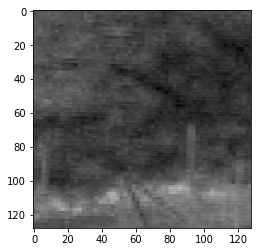

In [0]:
plt.imshow(Xval[1][0])

In [0]:
src1=cv2.imread('/content/images_evaluation_data/Validate/character02/0001_rgb.png')
dst1 = cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)

In [0]:

IMG = extractPatches(dst1, '/content/')


In [0]:
out_image = IMG.astype(np.uint8)

In [0]:
plt.imshow(out_image[200])

In [0]:
Xval.shape

(4, 4, 240, 240, 3)

In [0]:
yval.shape

(16, 1)

In [0]:
'''def get_image(path, height=256, width=256, set_mode='L'):
    print(path)
    image = imread(path, mode=set_mode)
    if height is not None and width is not None:
        image = imresize(image, [height, width], interp='nearest')
    return image'''

###LOAD IMAGES

In [0]:
Xval,yval,cval=loadimgs(val_folder)

  0%|          | 0/2 [00:00<?, ?it/s]

loading alphabet: Validate
alphabet_path /content/images_evaluation_2/Validate
letter New folder (4)
letter character15 - Copy
letter New folder (6)
letter character20
letter character19
letter New folder (5)
letter character15
letter character17 - Copy
letter character18


100%|██████████| 2/2 [00:00<00:00, 130.51it/s]

letter character16 - Copy
letter character20 - Copy
letter character18 - Copy
letter New folder (3)
letter character17
letter New folder
letter New folder (2)
letter character16
letter character19 - Copy
(36, 128, 128, 3)



In [0]:
X,y,c = loadimgs(train_folder)

  0%|          | 0/2 [00:00<?, ?it/s]

loading alphabet: IMAGES
alphabet_path /content/images_background_iv_2/IMAGES
letter character13 - Copy (2)
letter character07
letter character14 - Copy (2)
letter character01 - Copy
letter character11 - Copy
letter character05
letter character14 - Copy
letter character02 - Copy (2)
letter character07 - Copy
letter character06 - Copy
letter character03 - Copy (2)
letter character02 - Copy


  0%|          | 0/2 [00:00<?, ?it/s]

letter character03 - Copy
letter character10 - Copy (2)
letter character14
letter character05 - Copy (2)
letter character09 - Copy
letter character07 - Copy (2)
letter character12
letter character01
letter character04 - Copy (2)
letter character11
letter character11 - Copy (2)
letter character06
letter character02


  0%|          | 0/2 [00:00<?, ?it/s]

letter character08 - Copy (2)
letter character12 - Copy
letter character13 - Copy
letter character10
letter character03
letter character09 - Copy (2)
letter character05 - Copy
letter character08
letter character09
letter character13
letter character10 - Copy
letter character01 - Copy (2)
letter character12 - Copy (2)


100%|██████████| 2/2 [00:00<00:00, 315.42it/s]

letter character06 - Copy (2)
letter character04 - Copy
letter character04
letter character08 - Copy
(84, 128, 128, 3)



In [0]:
X.shape

(42, 2, 128, 128, 3)

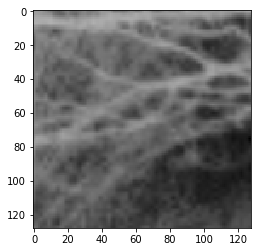

In [0]:
plt.imshow(Xval[1][0])

In [0]:
print(y.shape)

(80, 1)


In [0]:
c.keys()

dict_keys(['IMAGES'])

###Saving the train tensors on disk

In [0]:
with open(os.path.join(save_path,"train.pickle"), "wb") as f:
    pickle.dump((X,c),f)

###Loading the validation images into tensors

###Saving the validation tensors on disk

In [0]:
with open(os.path.join(save_path,"val.pickle"), "wb") as f:
    pickle.dump((Xval,cval),f)

###Loading the train tensors

In [0]:
with open(os.path.join(save_path, "train.pickle"), "rb") as f:
    (Xtrain, train_classes) = pickle.load(f)
 

In [0]:
with open(os.path.join(save_path, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)

In [0]:
def get_batch(batch_size,s="train"):
    """Create batch of n pairs, half same class, half different class"""
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h, color = X.shape

    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w,3)) for i in range(2)]
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size//2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_examples)
        pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 3)
        idx_2 = rng.randint(0, n_examples)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1,n_classes)) % n_classes
        
        pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h, 3)
    
    return pairs, targets

In [0]:
def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

In [0]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h,color = X.shape
    
    indices = rng.randint(0, n_examples,size=(N,))
    if language is not None: # if language is specified, select characters for that language
        low, high = categories[language]
        if N > high - low:
            raise ValueError("This language ({}) has less than {} letters".format(language, N))
        categories = rng.choice(range(low,high),size=(N,),replace=False)

    else: # if no language specified just pick a bunch of random letters
        categories = rng.choice(range(n_classes),size=(N,),replace=False)            
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h, 3)
    support_set = X[categories,indices,:,:]
    support_set[0,:,:] = X[true_category,ex2]
    support_set = support_set.reshape(N, w, h, 3)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]

    return pairs, targets

In [0]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
        probs = model.predict(inputs)
        if np.argmax(probs) == np.argmax(targets):
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

###SET PARAMETERS

In [0]:
# Hyper parameters
evaluate_every = 1 # interval for evaluating on one-shot tasks
batch_size = 1
n_iter = 900 # No. of training Epochs
N_way = 2 # how many classes for testing one-shot tasks
n_val = 2 # how many one-shot tasks to validate on
best = -1

In [0]:
model_path = '/content/'

In [0]:
model = one_shot(( 128, 128 ,3))
#model.summary()

In [0]:
adam = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=adam)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
sgd = SGD(lr=0.00000001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [0]:
optimizer = SGD(lr = 0.0006, decay=2e-6, momentum=0.009)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

In [0]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        #print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc

In [0]:
Xval.shape

(12, 2, 128, 128)

In [0]:
XNIR,yNIR,cNIR = loadimgs('/content/nir/')

100%|██████████| 1/1 [00:00<00:00, 515.40it/s]

loading alphabet: New folder
alphabet_path /content/nir/New folder
letter nir_4
letter nir_14
letter nir_15
letter nir_16
letter nir_17
letter nir_11
letter nir_8
letter nir_20
letter nir_3
letter nir_6
letter nir_10
letter nir_18
letter nir_9
letter nir_13
letter nir_2
letter nir_5
letter nir_1
letter nir_12
letter nir_7
letter nir_19
(20, 128, 128, 3)



In [0]:
Xval[3][0].shape

(128, 128)

In [0]:
XVIS,yVIS,cVIS = loadimgs('/content/vis/')

100%|██████████| 1/1 [00:00<00:00, 268.64it/s]

loading alphabet: New folder
alphabet_path /content/vis/New folder
letter vis_16
letter vis_2
letter vis_1
letter vis_13
letter vis_17
letter vis_11
letter vis_6
letter vis_14
letter vis_3
letter vis_4
letter vis_7
letter vis_20
letter vis_19
letter vis_12
letter vis_15
letter vis_18
letter vis_8
letter vis_5
letter vis_9
letter vis_10
(20, 128, 128, 3)



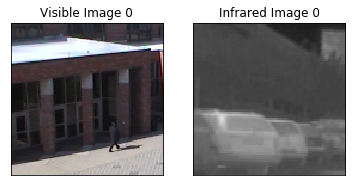

In [0]:
plt.subplot(121),plt.imshow(XVIS[1][0])
plt.title('Visible Image 0'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(XNIR[7][0])
plt.title('Infrared Image 0'), plt.xticks([]), plt.yticks([])
#plt.subplot(133),plt.imshow(XNIR[1][0])
#plt.title('Infrared Image 1'), plt.xticks([]), plt.yticks([])

plt.show() 

In [0]:
for i in range(20):
  MATCH = model.predict([XVIS[5].reshape(1,128,128,3), XNIR[i].reshape(1,128,128,3)])
  #print(MATCH*100)
  output = (100 - MATCH*100)
  print(i)
  print (output)
    

In [0]:
MATCH = model.predict([XVIS[1].reshape(1,128,128,1), XVIS[1].reshape(1,128,128,1)])
#print(MATCH*100)
output = 100 -MATCH*100
print (output)

[[48.64824]]


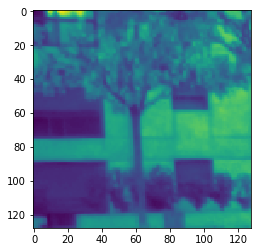

In [0]:
plt.imshow(XVIS[0][0])

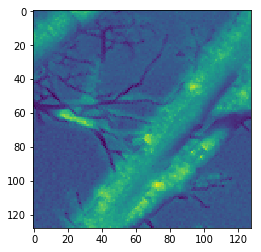

In [0]:
plt.imshow(XNIR[0][0])

In [0]:
XNIR.shape

(3, 1, 128, 128)

###PERFOMANCE:

In [0]:
output = 100 -probs*100
#print (output)

In [0]:
Xtest,ytest,ctest = loadimgs('/content/vis/')

In [0]:
plt.imshow(Xtest[0][0])

In [0]:
plt.imshow(Xtest[2][1])

In [0]:
probs = model.predict([Xtest[0].reshape(2,128,128,1), Xtest[2].reshape(2,128,128,1)])
print(probs*100)
output = 100 -probs*100
#print (output)

In [0]:
Xtest[0].shape

###We can plot the training and validation accuracy and loss at each epoch by using the history variable returned by the fit function

In [0]:
loss = sig_history.history['loss']
val_loss = sig_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc = sig_history.history['acc']
val_acc = sig_history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
ways = np.arange(1, 30, 2)
resume =  False
val_accs, train_accs,nn_accs = [], [], []
trials = 450
for N in ways:
    val_accs.append(loader.test_oneshot(model, N,trials, "val", verbose=True))
    train_accs.append(loader.test_oneshot(model, N,trials, "train", verbose=True))
    nn_accs.append(test_nn_accuracy(N,trials, loader))
    
#plot the accuracy vs num categories for each
plt.plot(ways, val_accs, "m")
plt.plot(ways, train_accs, "y")
plt.plot(ways, nn_accs, "c")

plt.plot(ways,100.0/ways,"r")
plt.show()